In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

# From time stamps
from datetime import datetime 

# The tech stocks we'll use for this analysis
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the data using yfinance directly
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Create a list of the downloaded data
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company names and concatenate into a single dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the dataframe
df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.183578,46172700,APPLE
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.084564,64588900,APPLE
2023-09-27,172.619995,173.039993,169.050003,170.429993,169.562317,66921800,APPLE
2023-09-28,169.339996,172.029999,167.619995,170.690002,169.821014,56294400,APPLE
2023-09-29,172.020004,173.070007,170.339996,171.210007,170.338348,51814200,APPLE
...,...,...,...,...,...,...,...
2024-09-18,186.449997,188.800003,185.059998,186.429993,186.429993,34448100,AMAZON
2024-09-19,190.039993,190.990005,188.470001,189.869995,189.869995,39543200,AMAZON
2024-09-20,190.229996,191.839996,187.410004,191.600006,191.600006,100378600,AMAZON


In [2]:
# Sumary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,193.114801,194.913294,191.469087,193.296230,192.831618,5.971854e+07
std,19.738150,19.978341,19.293978,19.653056,19.840439,2.959566e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.959995,177.952503,175.017498,177.024994,176.212837,4.500432e+07
50%,189.449997,190.614998,188.019997,189.419998,188.703934,5.300555e+07
75%,212.092499,214.937500,209.212505,212.635006,212.389172,6.547662e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.186799e+08


In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-09-25 to 2024-09-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


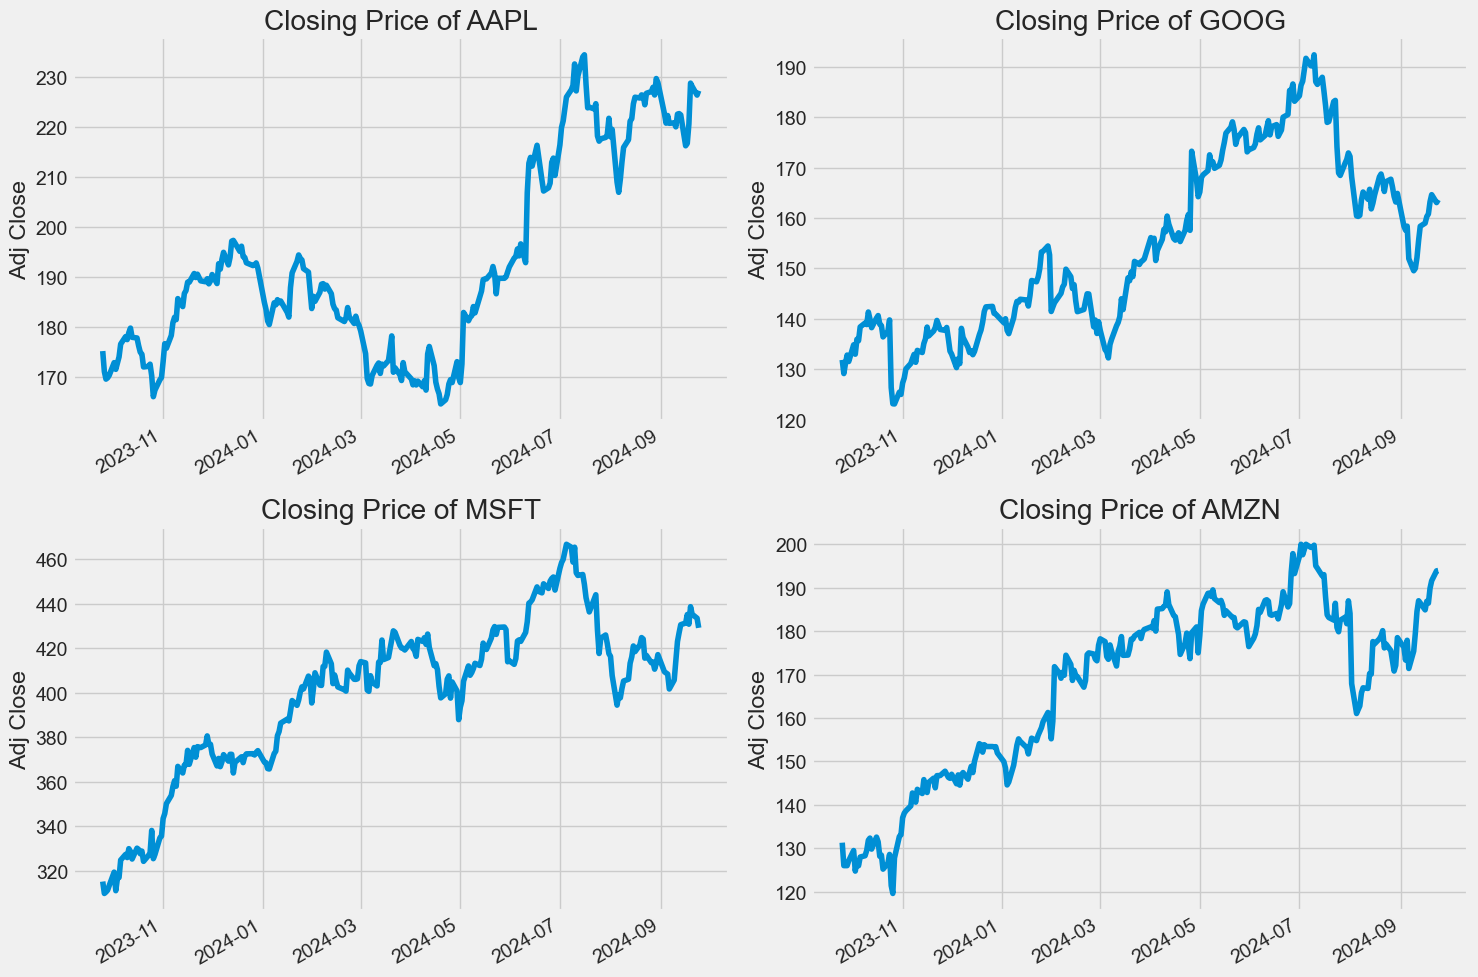

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate (company_list, 1):
    plt.subplot(2, 2, i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

Volume of Sales

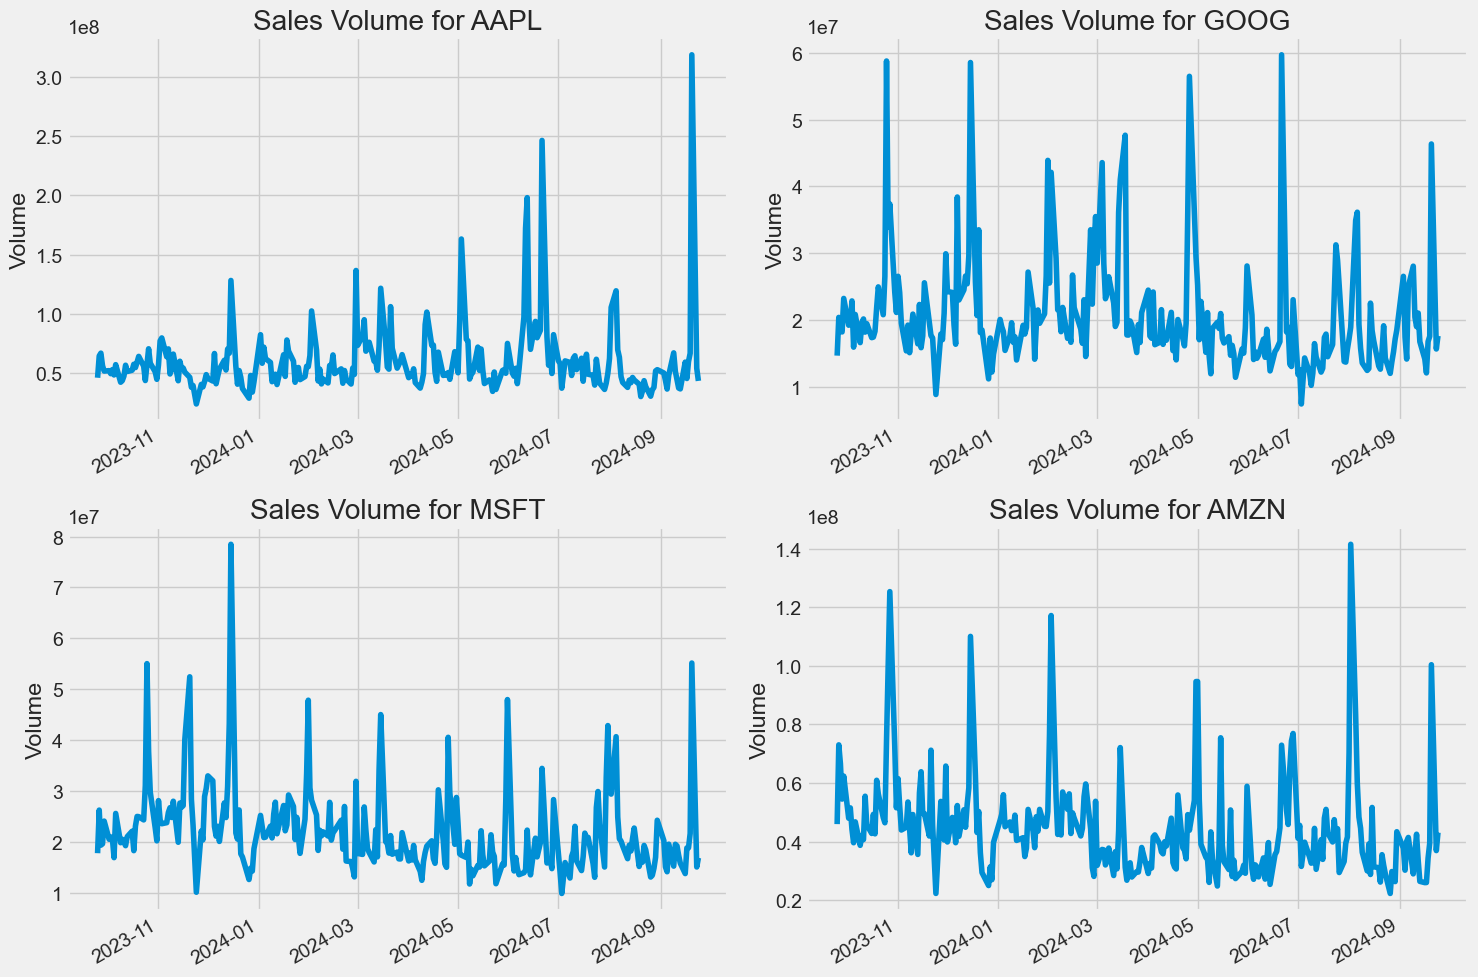

In [5]:
# Let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

What was the Moving Average of the verious Stock

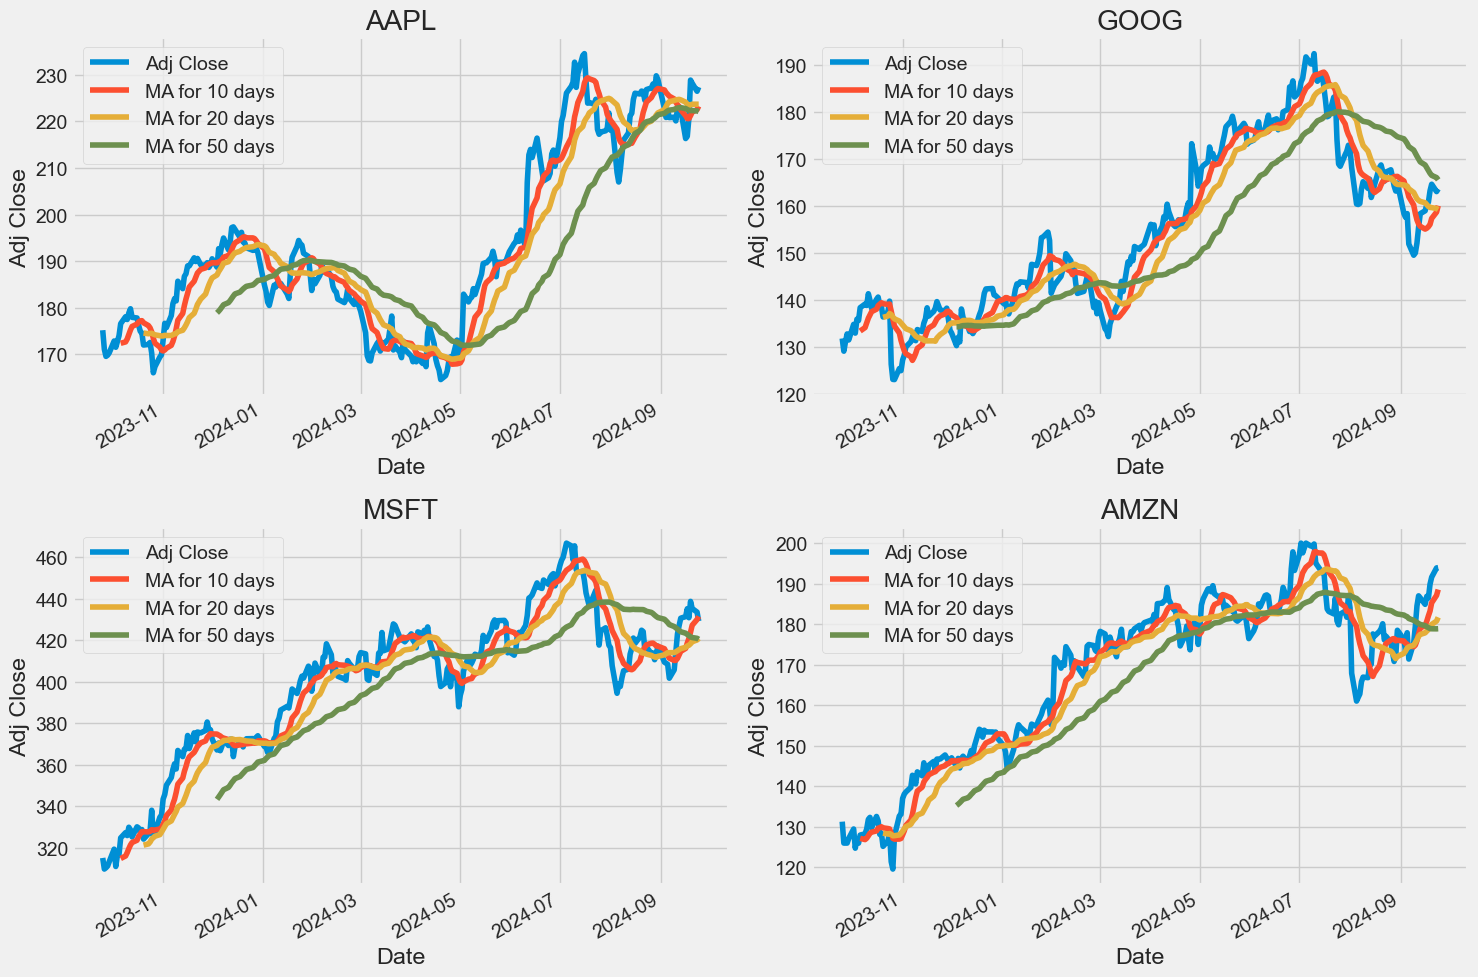

In [6]:
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for company in company_list:  # Corrected typo here
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # Plot the adjusted close price along with the moving averages
    company[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=plt.gca())
    plt.ylabel("Adj Close")
    plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()
plt.show()


What was the Daily Return of the Stock on Average?

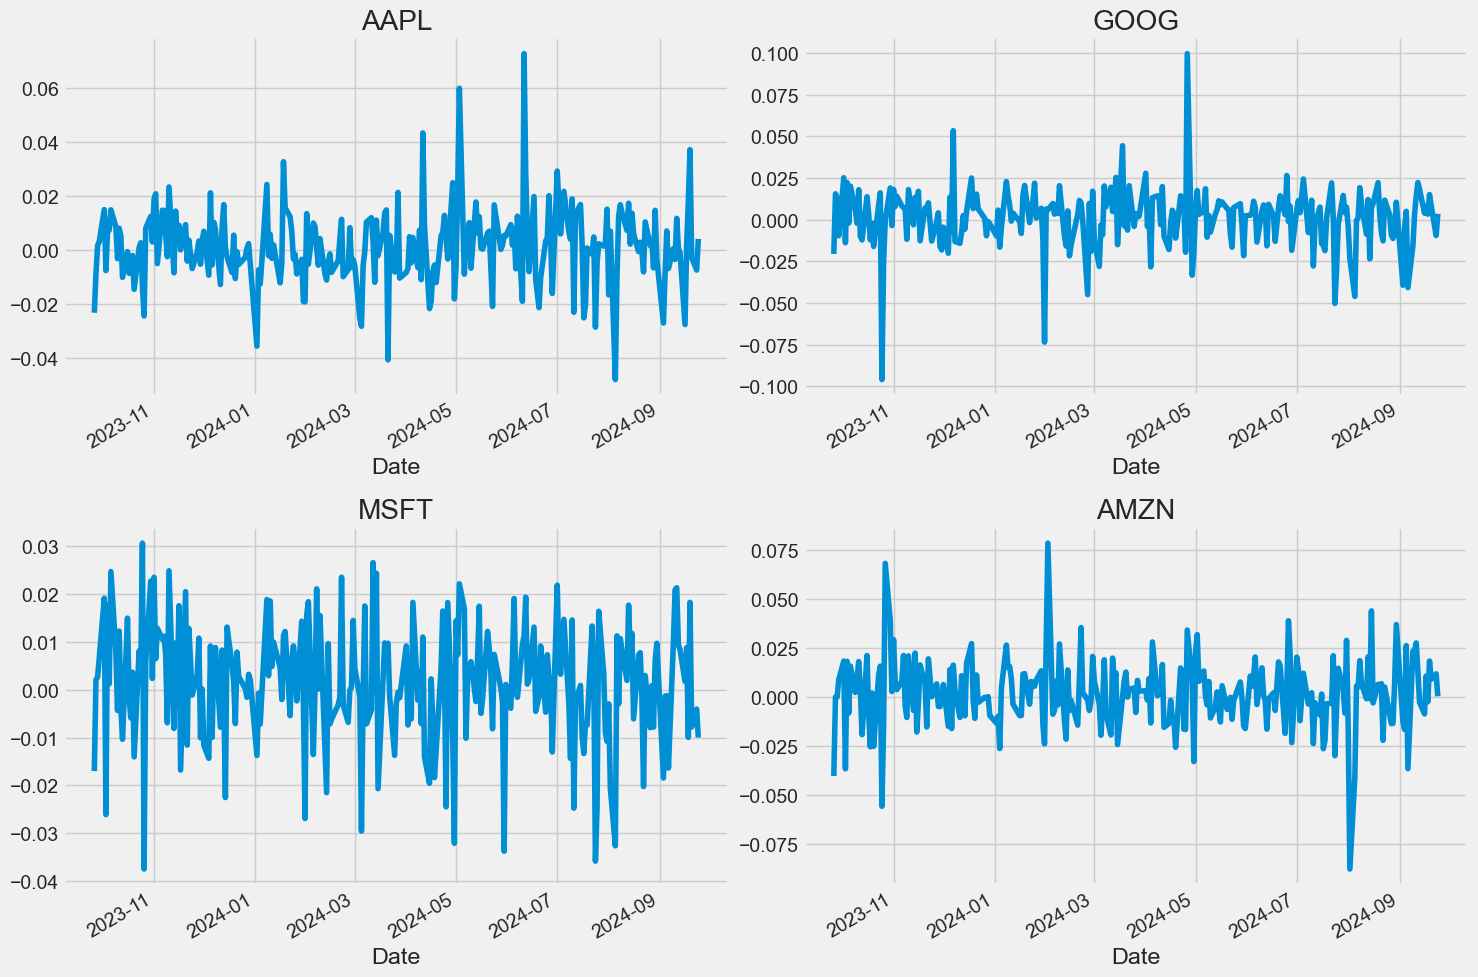

In [7]:
# We will use pct_change to find the percent change for each day
for company in company_list:
    company["Daily Returns"] = company["Adj Close"].pct_change()

# Then we will plot the daily return percentage
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Daily Returns"].plot()
    plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()
plt.show()

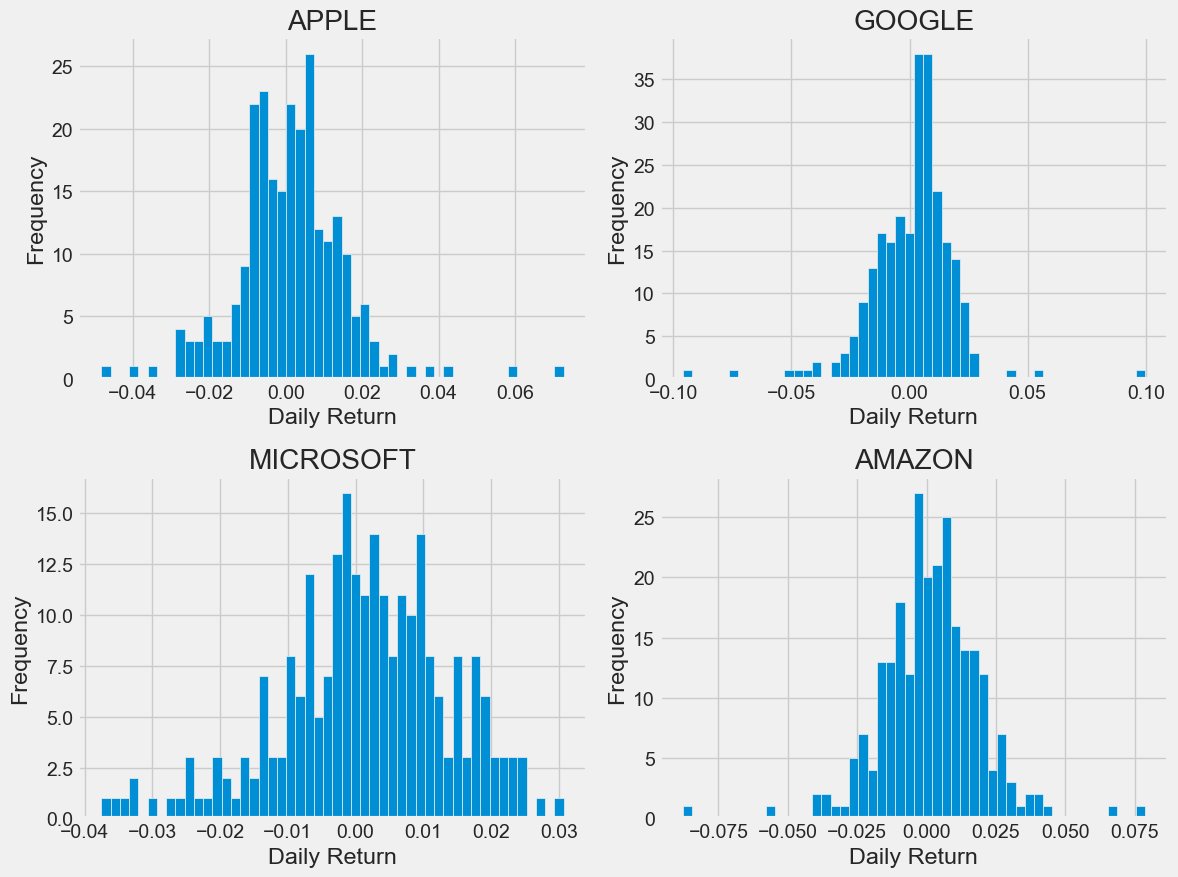

In [8]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1) :
    plt.subplot(2, 2, i)
    company["Daily Returns"].hist(bins = 50)
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.title(f"{company_name[i - 1]}")

plt.tight_layout()
plt.show() 

What was the Correlation between different stocks closing prices?

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = yf.download(tech_list, start = start, end = end)["Adj Close"] # using yfinance to download the data

#make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-09-25 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-09-26 00:00:00+00:00,-0.023398,-0.040299,-0.020580,-0.017006
2023-09-27 00:00:00+00:00,-0.008898,0.000000,0.015527,0.002082
2023-09-28 00:00:00+00:00,0.001526,0.000000,0.012703,0.002717
2023-09-29 00:00:00+00:00,0.003046,0.009049,-0.009615,0.006727


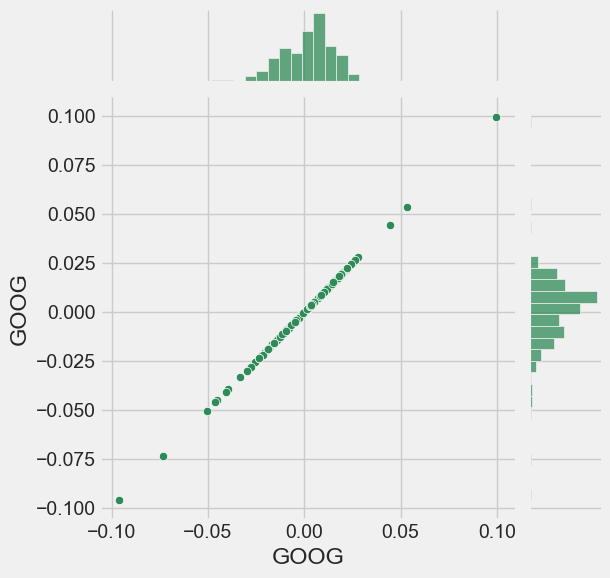

In [10]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x="GOOG", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")


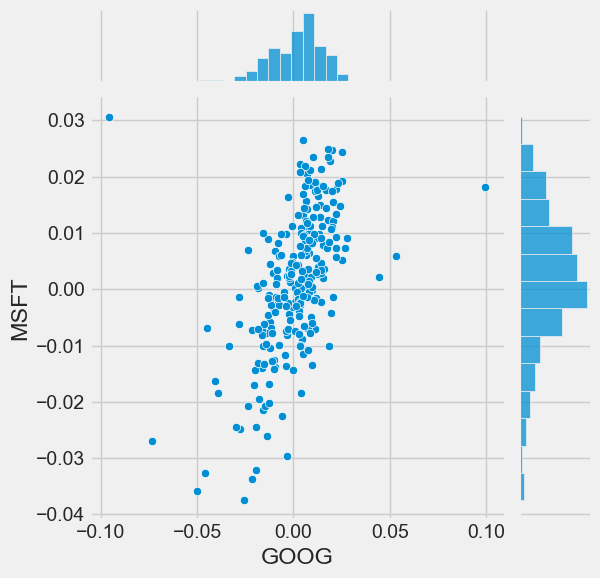

In [11]:
# We'll use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind="scatter")


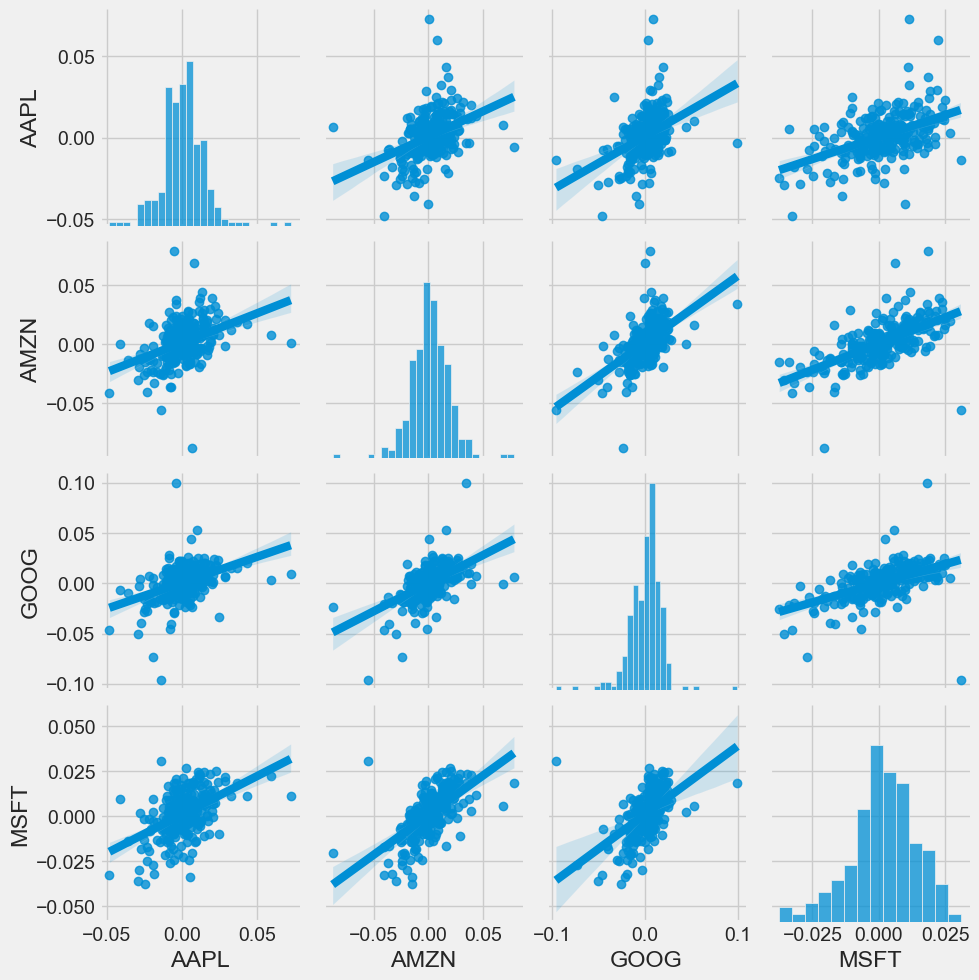

In [12]:
# we can simply call pairplot on our DataFramer for an automatic visul analysis of all the comparisons
sns.pairplot(tech_rets, kind="reg")

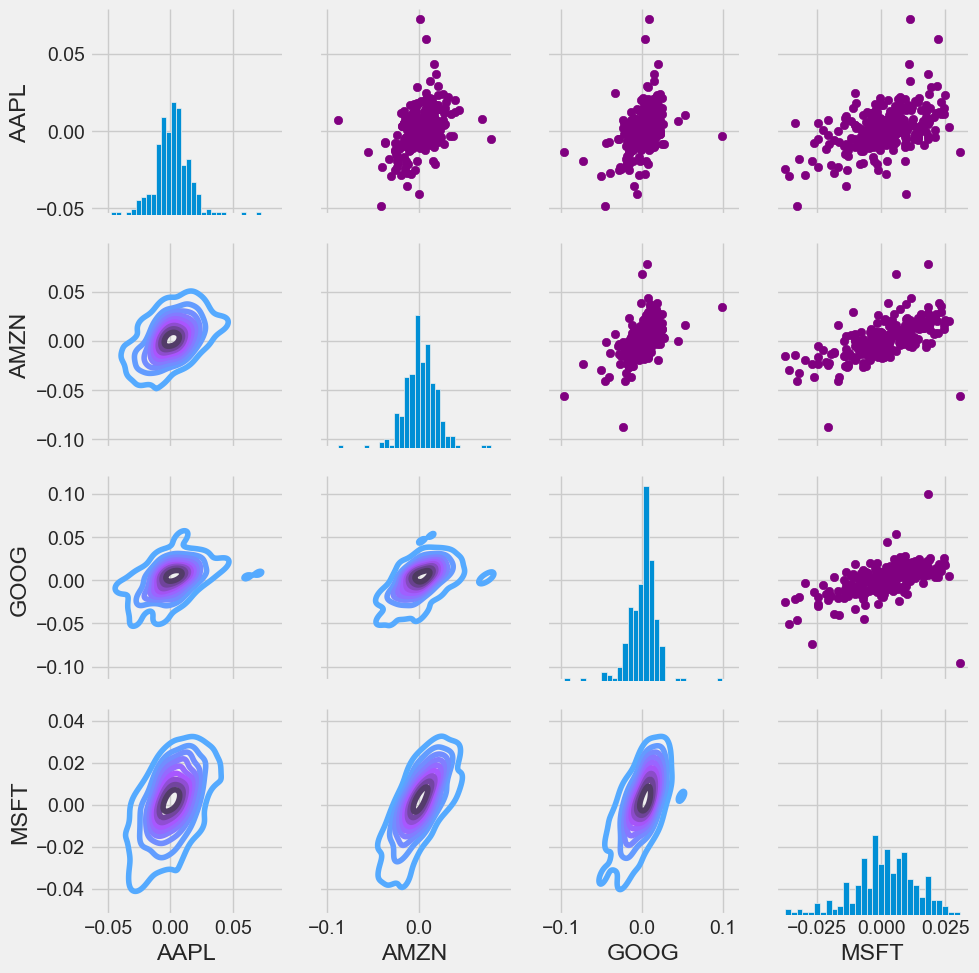

In [13]:
# Set up our figure by naming it returns_fig, call PairPlot on the data frame 
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_Upper we can specify what upper tringle will look like 
return_fig.map_upper(plt.scatter, color="purple")

#we can also define the lower triangle in the figur, including the plot type (kde) or the color (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap="cool_d") # kdeplot is a Kernel Density Estimation plot

# Finally we will define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

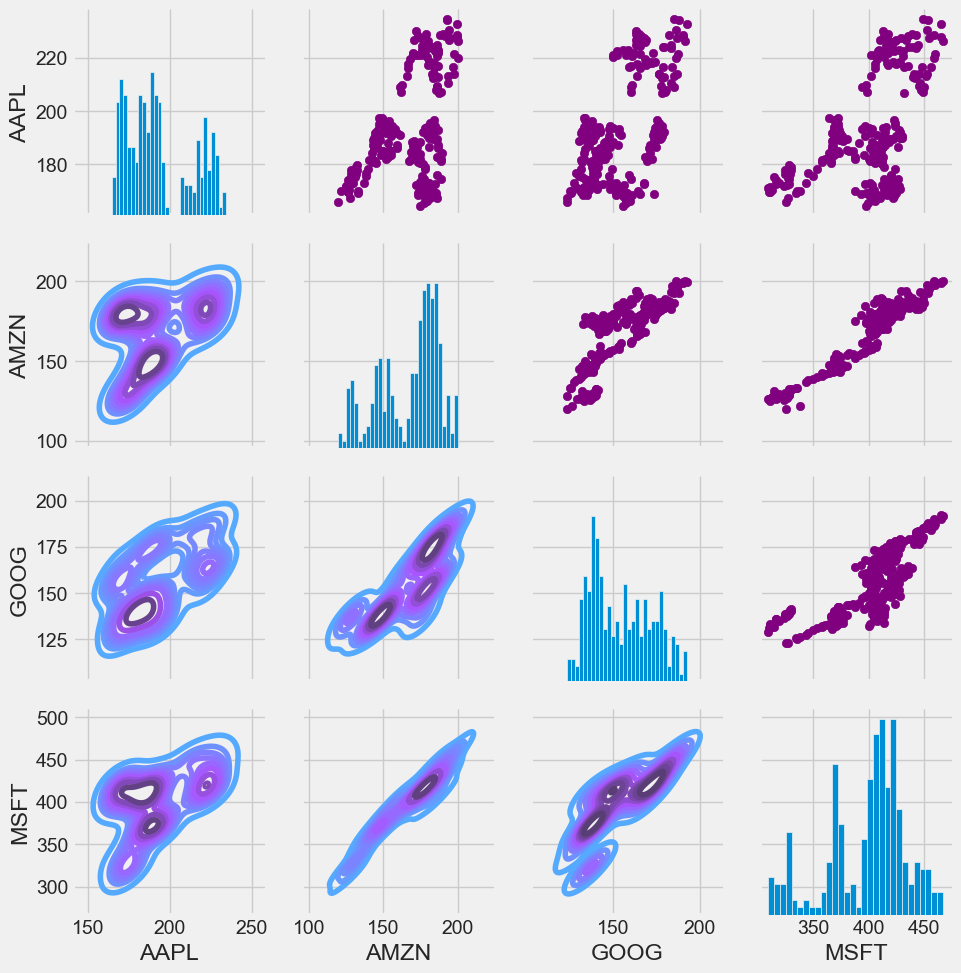

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming closing_df is already defined

# Setup our figure by naming it returns_fig, call PairGrid on the DataFrame 
return_fig = sns.PairGrid(closing_df)

# Using map_upper, we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color="purple")

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap="cool_d")  # Corrected 'camp' to 'cmap'

# Finally, we will define the diagonal as a series of histogram plots of the daily return 
return_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


Text(0.5, 1.0, 'correlation of stock price')

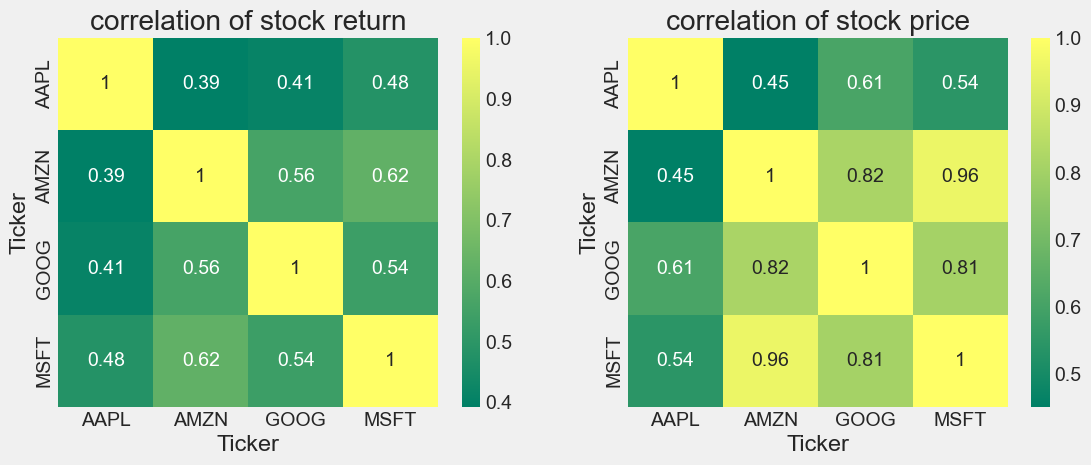

In [15]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer") # annot = True will add the correlation values on the plot
plt.title("correlation of stock return")

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap="summer")
plt.title("correlation of stock price")

How much value do we put at risk by investing in a particular stock?

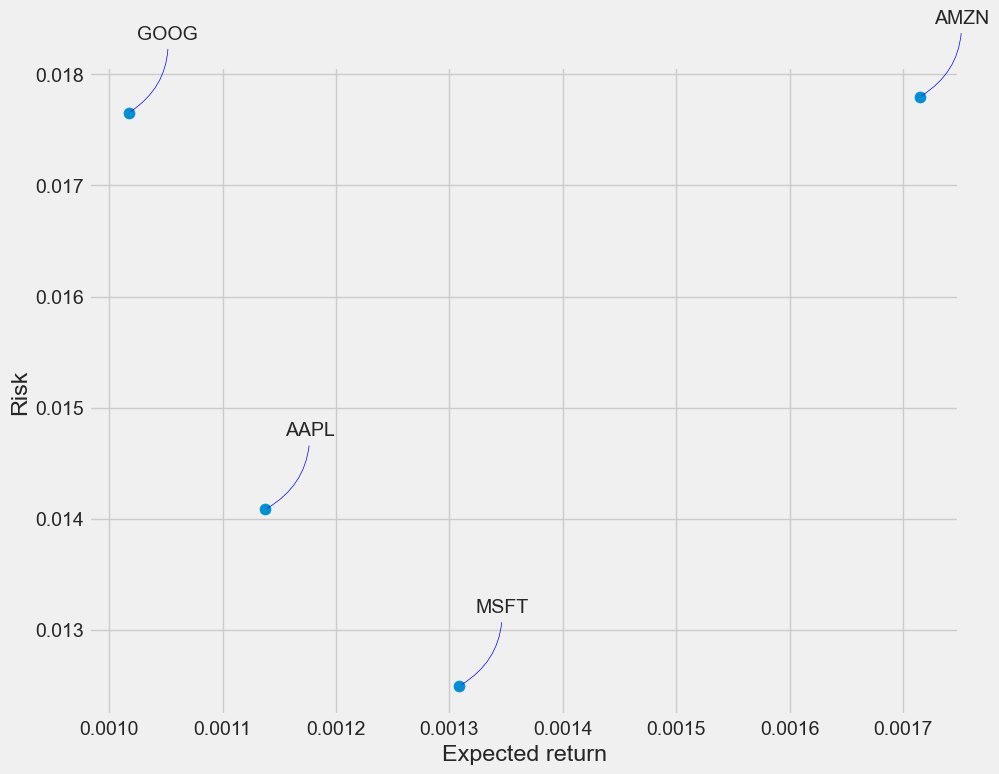

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected return")  # Corrected function name
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):  # Corrected 'column' to 'columns'
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords="offset points", 
                 ha="right", va="bottom", arrowprops=dict(arrowstyle="-", color="blue", connectionstyle="arc3,rad=-0.3"))

plt.show()


predicting the closing price stock price of APPLE inc:

In [17]:
import yfinance as yf
from datetime import datetime

# Get the stock quote for Apple
df = yf.download("AAPL", start="2012-01-01", end=datetime.now())
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402629,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469277,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607715,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719309,394024400
...,...,...,...,...,...,...
2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900
2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300
2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900


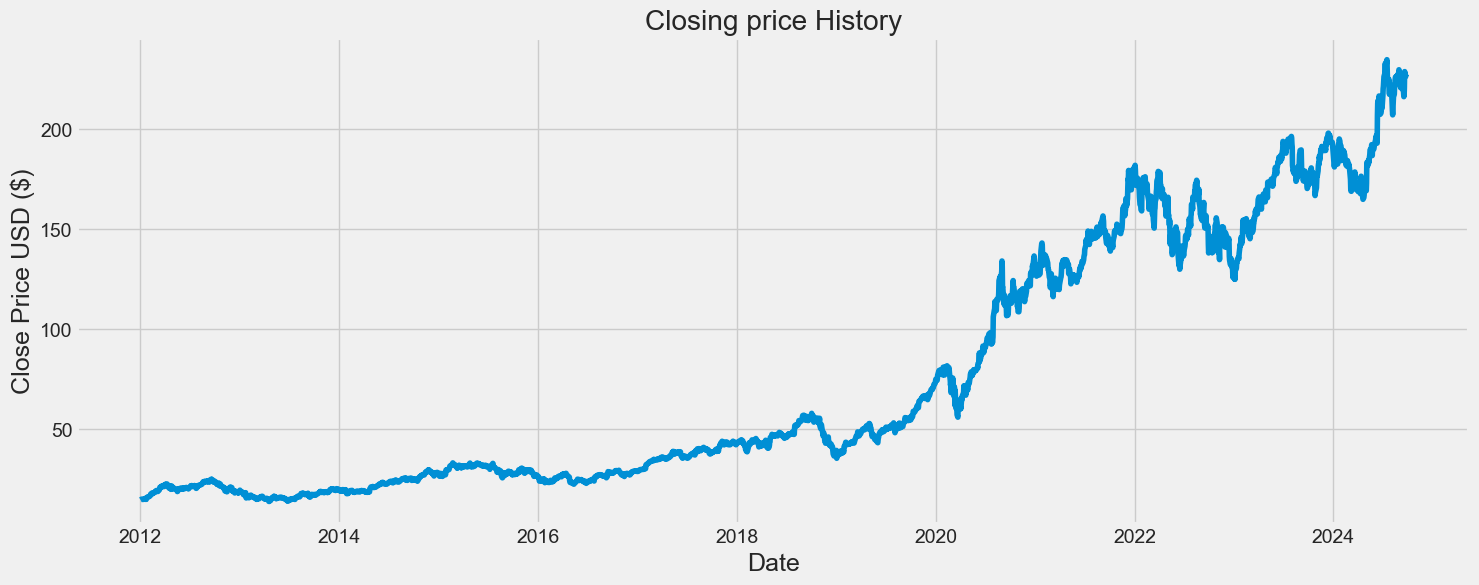

In [18]:
plt.figure(figsize = (16,6))
plt.title("Closing price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.show()

In [19]:
# Create a new dataframe with only the Close column
data = df.filter(["Close"])

#convert the dataframe to s numpy array 
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.95))
training_data_len

3042

In [20]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.97002791],
       [0.96219536],
       [0.96627008]])

In [21]:
# Create the Training data set 
#Create the scaled tarining dataset
train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)  # Use = instead of -

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check the shape of x_train
x_train.shape


[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

(2982, 60, 1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Use Input layer for the input shape
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2982/2982 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0013


In [23]:
# Create the testing data set 
# Create a new array containing scaled values from index 1543 to 2002

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


5.822967517122355

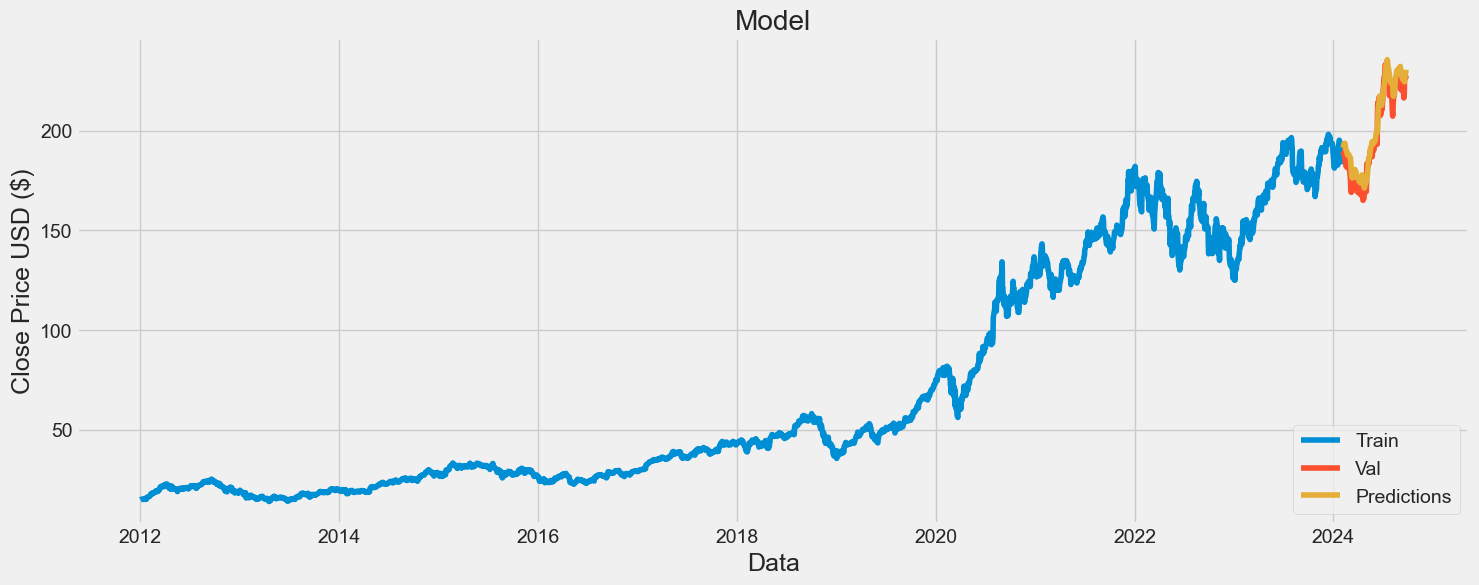

In [24]:
# Split the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Create a copy to avoid the warning

# Assuming 'predictions' is already generated and is a numpy array or a list
valid.loc[:, "Predictions"] = predictions  # This should now work without a warning

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"], label="Train")
plt.plot(valid["Close"], label="Val")
plt.plot(valid["Predictions"], label="Predictions")  # Use the correct column name here
plt.legend(loc="lower right")
plt.show()


In [25]:
valid # Show the valid and predicted prices

,Close,Predictions
Date,,
2024-02-06,189.300003,191.393112
2024-02-07,189.410004,192.096634
2024-02-08,188.320007,192.921951
2024-02-09,188.850006,193.331284
2024-02-12,187.149994,193.632919
...,...,...
2024-09-18,220.690002,224.564316
2024-09-19,228.869995,224.485336
2024-09-20,228.199997,226.864914


In [26]:
# Define sequence length (this should be the same as what you used during training)
sequence_length = 30  # Example: LSTM model uses the last 30 days to predict the next day


[*********************100%***********************]  1 of 1 completed

DataFrame loaded successfully:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742668  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565201  132079200
Epoch 1/5



c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0143
Epoch 2/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0031
Epoch 3/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0022
Epoch 4/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0025
Epoch 5/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0019
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/

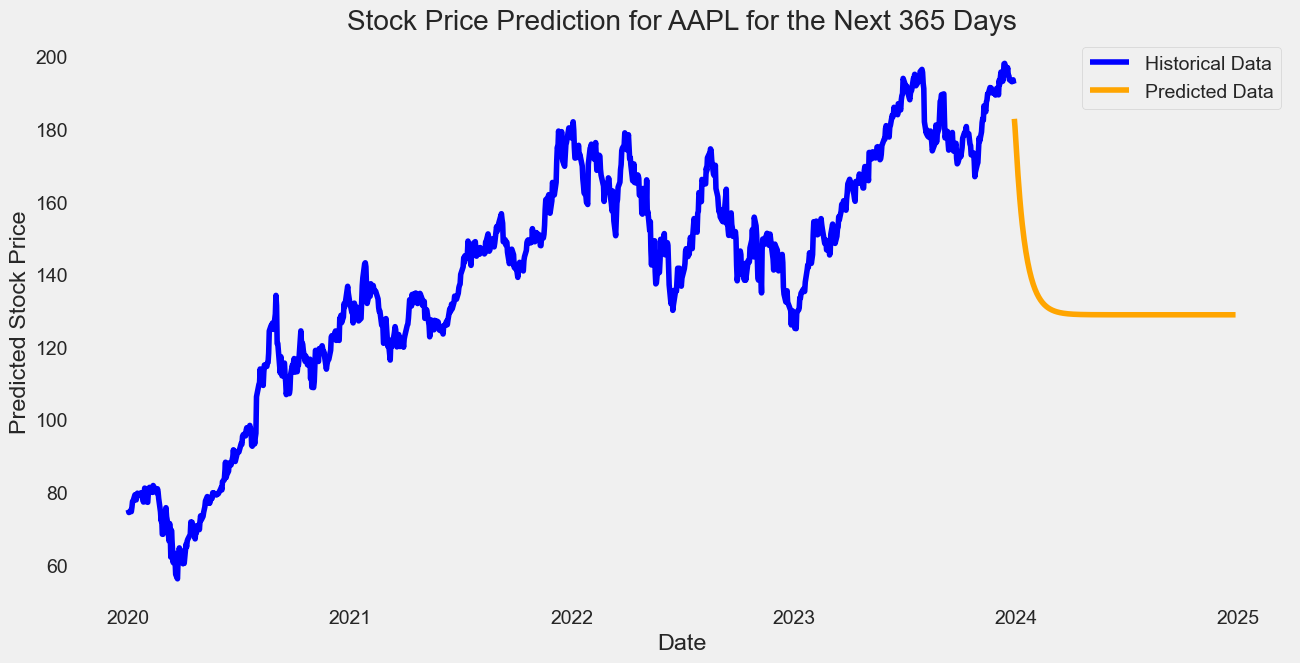

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Specify the stock ticker symbol and the time period for fetching data
ticker_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2020-01-01'  # Adjust the start date as needed
end_date = '2024-01-01'  # Adjust the end date as needed

# Fetch stock data from Yahoo Finance
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows to confirm the data is loaded correctly
print("DataFrame loaded successfully:")
print(df.head())

# Ensure 'Close' column exists
if 'Close' not in df.columns:
    raise KeyError("The 'Close' column does not exist in the DataFrame.")

# Extract the 'Close' prices and convert to a NumPy array
close_prices = df['Close'].values.reshape(-1, 1)  # Ensure it's a 2D array

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)  # Fit and transform the data

# Define your sequence length
sequence_length = 60  # Example: 60 days for predictions

# Prepare the training data for your model
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Previous 'sequence_length' days
    y.append(scaled_data[i, 0])  # Target is the next day's price

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=5)  # Adjust epochs as needed

# Now for predicting the next 365 days
future_days = 365

# Get the last sequence from the training data
last_sequence = scaled_data[-sequence_length:]  # Get the last 'sequence_length' days
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))  # Reshape for model input

predictions = []

# Iterative prediction for the next 365 days
for day in range(future_days):
    next_day_prediction = model.predict(last_sequence)
    predictions.append(next_day_prediction[0, 0])  # Store prediction
    next_day_prediction_reshaped = np.reshape(next_day_prediction, (1, 1, 1))  # Reshape
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction_reshaped, axis=1)

# Inverse scale the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create future dates for the next 365 days
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime
last_date = df.index.max()  # Get the last date
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# Create a DataFrame for the predictions
predicted_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predictions.flatten()})

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Data', color='blue')  # Historical data
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Data', color='orange')  # Predicted data
plt.title(f'Stock Price Prediction for {ticker_symbol} for the Next 365 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid()
plt.show()


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your stock price data
# df = pd.read_csv('your_stock_data.csv')  # Make sure to load your data

# Assuming you have a DataFrame 'df' with a 'Close' column
# Extract the 'Close' prices and convert to a NumPy array
close_prices = df['Close'].values.reshape(-1, 1)  # Ensure it's a 2D array

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)  # Fit and transform the data

# Define your sequence length
sequence_length = 60  # Example: 60 days for predictions

# Prepare the training data for your model (this step may vary based on your model type)
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Previous 'sequence_length' days
    y.append(scaled_data[i, 0])  # Target is the next day's price

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input if needed

# Now you can continue with training your model or making predictions
